In [1]:
import re
import os
import string
import warnings

import matplotlib.lines as mlines
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = "Times New Roman"
csfont = {'fontname':'Times New Roman'}

In [2]:
# windows working dir

assets_dir = "C:\\Users\\borki\\Dropbox\\twitter_nlp_project2\\assets"

In [3]:
df = pd.read_csv("vader_sentiment_tweets.csv")

In [4]:
# cluster labels
labels = np.arange(5)
label_names = ["Far Right", "Right Centrist", "Centrist", "Left Centrist", "Far Left"][
    ::-1
]

In [5]:
df.head(1)

,tweet_id,username,party,tweet,clean_text,favorite_count,retweet_count,created_at,source,social_policy,...,rank,score,govtrack_cluster,progressive_cluster,govtrack_class,positive_sentiment,neutral_sentiment,negative_sentiment,compound_sentiment,sentiment_text
0,1499070296338350081,boblatta,R,The PADE Act would ban the importation of Russ...,the pade act would ban the importation of russ...,3,0,2022-03-02 17:13:04+00:00,Twitter Web App,NaN,...,#45,0.77,4,4,Far Right,0.124001,0.769001,0.107001,-0.102699,negative


### Boxplots, Violin, and Swarmplots

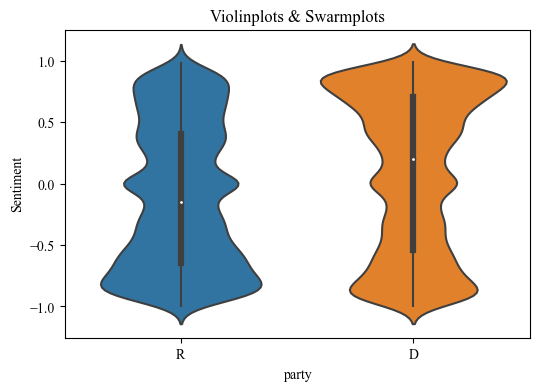

In [9]:
plt.figure(1, figsize=(6, 4))

sns.violinplot(x="party", y="compound_sentiment", data=df)
# sns.swarmplot(x="party", y="compound_sentiment", data=df[:5000], palette="Paired")
plt.ylabel("Sentiment")
plt.title("Violinplots & Swarmplots")
plt.show()

In [11]:
def custom_legend(ax, bbox: tuple = (0, 0)):

    #     legends
    title = mlines.Line2D([], [], label="Party", color="white", linewidth=7)
    red_patch = mlines.Line2D([], [], color="red", label="R", linewidth=7, alpha=0.5)
    blue_path = mlines.Line2D([], [], color="blue", label="D", linewidth=7, alpha=0.5)

    leg = ax.legend(
        handles=[title, blue_path, red_patch],
        bbox_to_anchor=bbox,
        borderaxespad=0,
        ncol=3,
        frameon=False,
    )

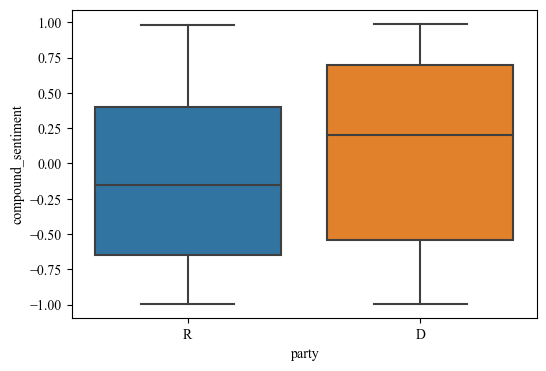

In [12]:
# plot boxplot of sentiment against party

plt.figure(1, figsize=(6, 4))

sns.boxplot(data=df, x="party", y="compound_sentiment")

plt.show()

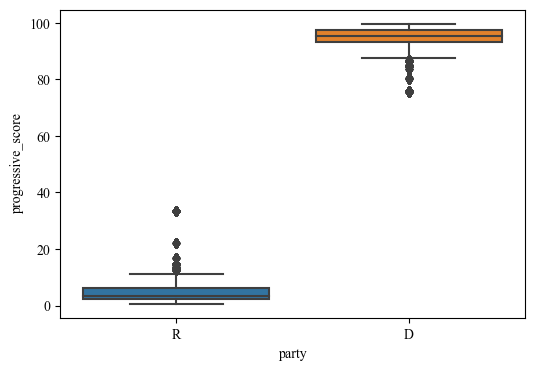

In [13]:
# plot boxplot of sentiment against progressive_score

plt.figure(1, figsize=(6, 4))

sns.boxplot(data=df, x="party", y="progressive_score")

plt.show()

### Distribution Plots

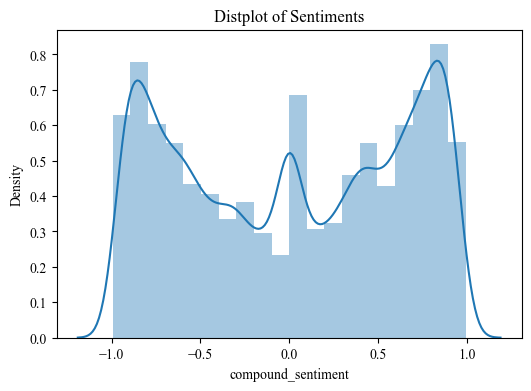

In [14]:
# sentiment

plt.figure(1, figsize=(6, 4))

sns.distplot(df["compound_sentiment"], bins=20)
plt.title("Distplot of Sentiments")

plt.show()

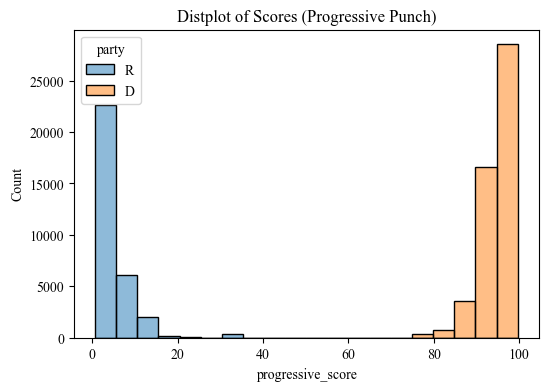

In [15]:
# sentiment

plt.figure(1, figsize=(6, 4))

sns.histplot(data=df, x="progressive_score", bins=20, hue="party")
plt.title("Distplot of Scores (Progressive Punch)")
# plt.legend(loc='best')

plt.show()

### GovTrack Data Analysis

In [16]:
data = df[["username", "score", "party"]].drop_duplicates()
df_rep = data[data.party.str.contains("R")]
df_dem = data[data.party.str.contains("D")]

In [17]:
round((df_dem.score.describe())["mean"], 2)

0.28

In [18]:
round((df_rep.score.describe())["mean"], 2)

0.71

In [19]:
# Independent T Test of the GovTrack Scores
            # compute independent t-test
t_stat, p_value, dof = ttest_ind(
                 df_rep.score, df_dem.score, 
            )
print(t_stat, p_value, dof)

39.13620859205974 1.4961964388747405e-128 343.0


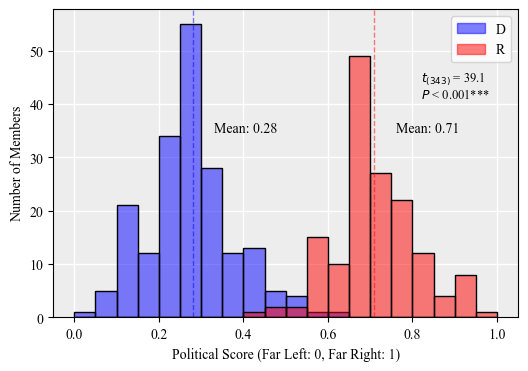

In [20]:
# sentiment

fig1 = plt.figure(1, figsize=(6, 4))

ax = fig1.add_subplot(1, 1, 1)


# # set axis below
# ax.grid(zorder=0)

sns.histplot(
    data=df[["username", "score", "party"]].drop_duplicates(),
    x="score",
    bins=20,
    hue="party",
    palette={"D": "b", "R": "r"},
    **dict(alpha=0.5),
)

# grid lines based on major tick
ax.grid(which="major", color="w", linestyle="-", linewidth=1)

ax.yaxis.grid(True)  # Hide the horizontal gridlines
ax.xaxis.grid(True)  # Show the vertical gridlines

# set axis below
ax.set_axisbelow(True)

# plt.title("Distribution of Political Scores", fontsize=10)
plt.ylabel("Number of Members", fontsize=10, **csfont)
ax.set_facecolor("#D3D3D3")
ax.patch.set_alpha(0.4)
plt.xlabel("Political Score (Far Left: 0, Far Right: 1)", fontsize=10, **csfont)
min_ylim, max_ylim = plt.ylim()
#     legends
red_patch = mpatch.Patch(color="red", label="R", alpha=0.5)
blue_path = mpatch.Patch(color="blue", label="D", alpha=0.5)
plt.axvline(
    round((df_dem.score.describe())["mean"], 2),
    color="blue",
    linestyle="dashed",
    linewidth=1,
    alpha=0.5,
)
plt.axvline(
    round((df_rep.score.describe())["mean"], 2),
    color="red",
    linestyle="dashed",
    linewidth=1,
    alpha=0.5,
)
plt.text(
    round((df_rep.score.describe())["mean"], 2)+0.05,
    max_ylim * 0.6,
    "Mean: {:.2f}".format(round((df_rep.score.describe())["mean"], 2)),
    fontsize=10,
    **csfont
)
plt.text(
    round((df_dem.score.describe())["mean"], 2)+0.05,
    max_ylim * 0.6,
    "Mean: {:.2f}".format(round((df_dem.score.describe())["mean"], 2)),
    fontsize=10,
    **csfont
)

leg = ax.legend(handles=[blue_path, red_patch], frameon=True, loc="best")
ax.text(0.82, 44, "$t_{(343)}$"+f" = {round(t_stat, 1)}", fontsize=9, **csfont)
ax.text(0.82, 41, "$P$"+f" < 0.001***", fontsize=9, **csfont)
plt.show()
fig1.savefig(
    assets_dir+"\\govtrack_hist.png",
    dpi=100,
    bbox_inches="tight",
)

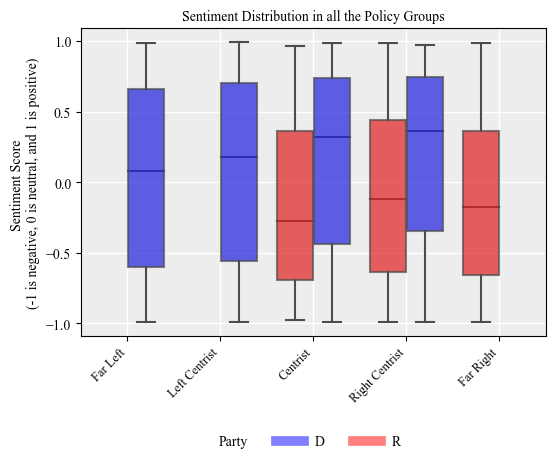

In [30]:
# plot boxplot of the clusters

fig2 = plt.figure(1, figsize=(6, 4))
ax = fig2.add_subplot(1, 1, 1)

sns.boxplot(
    data=df,
    x="govtrack_cluster",
    y="compound_sentiment",
    hue="party",
    dodge=True,
    palette={"D": "b", "R": "r"},
    boxprops=dict(alpha=0.7, zorder=3),
)

# grid lines based on major tick (x)
ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="x")

ax.xaxis.grid(True)  # Show the vertical gridlines

# y axis grid
ax.set_yticks(np.arange(-1, 1.5, 0.5), major=True)

# grid lines based on minor tick (y)
ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="y")

# Remove minor ticks
ax.tick_params(which="minor", bottom=False, left=False)


# set axis below
ax.set_axisbelow(True)

plt.xticks(ticks=labels, rotation=45, labels=label_names, fontsize=9)
ax.set_xticks(labels)
ax.set_xticklabels(labels=label_names, fontsize=9, rotation=45, ha="right")
ax.set_facecolor("#D3D3D3")
ax.patch.set_alpha(0.4)
plt.title(
    "Sentiment Distribution in all the Policy Groups",
    fontsize=10,
)
plt.ylabel("Sentiment Score \n(-1 is negative, 0 is neutral, and 1 is positive)", fontsize=10)
plt.xlabel("")
# custom legend
custom_legend(ax, bbox=(0.7, -0.3))

plt.show()

fig2.savefig(
    assets_dir+"\\general_sentiment.png",
    dpi=100,
    bbox_inches="tight",
)

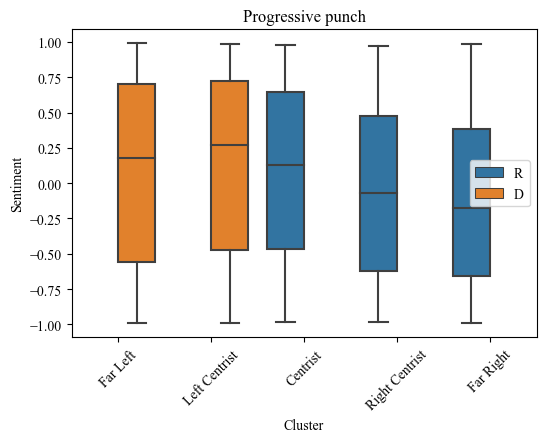

In [22]:
# plot boxplot of the clusters

fig = plt.figure(1, figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df, x="progressive_cluster", y="compound_sentiment", hue="party")
plt.xticks(ticks=labels, rotation=45, labels=label_names, fontsize=10)
plt.title("Progressive punch")
plt.ylabel("Sentiment")
plt.xlabel("Cluster")
plt.legend(loc="best")
plt.show()

In [23]:
# plot per policy
import json

# open json file consisting of policies and its sub-groups
with open("data.json") as json_file:
    categories = json.load(json_file)

In [24]:
articles = ["and", "LGBTQ", "the", "of", 'CHIPS', 'Ukraine-Russia']

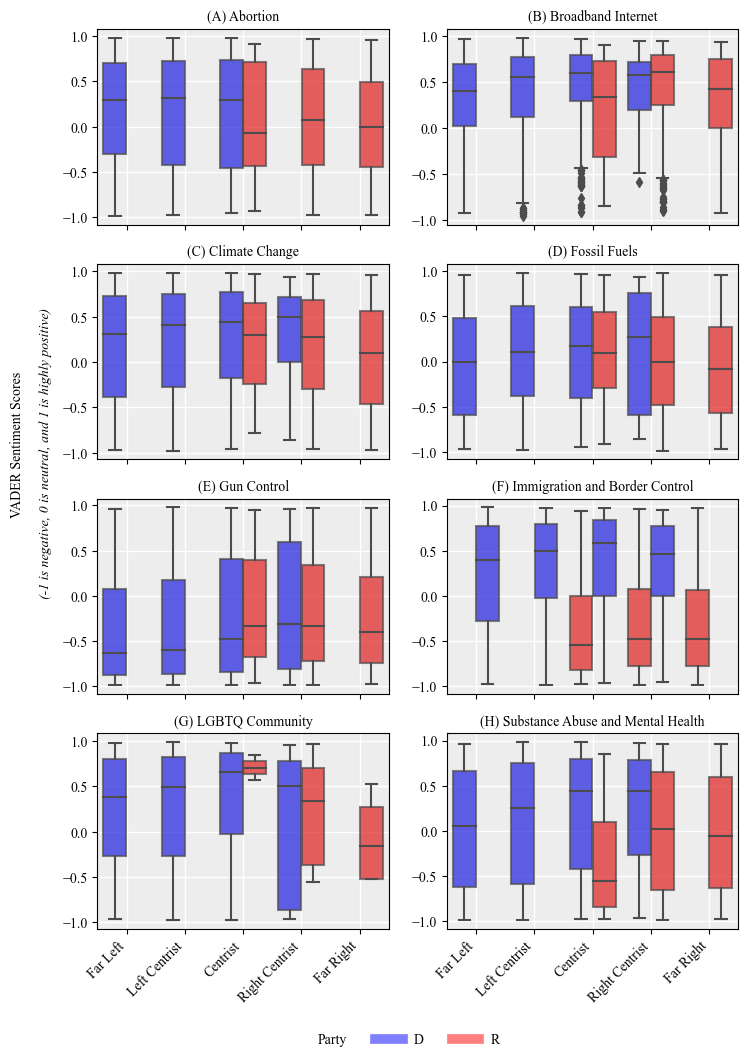

In [23]:
# social policies

social_policies = categories["Social Policies"]
social_policies = list(social_policies.keys())
social_policies.remove("All")

fig3 = plt.figure(1, figsize=(8.27, 11.69), dpi=100)
n = 0

for policy in sorted(social_policies, key=lambda x: x.lower()):

    str_list = string.ascii_uppercase

    title = " ".join(
        [
            word.capitalize() if word not in articles else word
            for word in policy.split(" ")
        ]
    )
    # category df
    cat_df = df[df.policies.str.contains(r"%s" % policy, re.I, regex=True)]

    n += 1

    ax = fig3.add_subplot(4, 2, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    sns.boxplot(
        data=cat_df,
        x="govtrack_cluster",
        y="compound_sentiment",
        hue="party",
        dodge=True,
        palette={"D": "b", "R": "r"},
        boxprops=dict(alpha=0.7)
    )
    # plt.xticks(ticks=labels, rotation=45, labels=label_names, fontsize=8)
    ax.set_xticklabels([])
    if n > 6:
        ax.set_xticks(labels,**csfont)
        ax.set_xticklabels(labels=label_names, fontsize=10, **csfont, rotation=45, ha="right")
    plt.ylabel("")
    plt.xlabel("")
    plt.title("{}".format(f"({str_list[n-1]}) {title}"), fontsize=10,**csfont)
    ax.get_legend().remove()

    ax.set_facecolor("#D3D3D3")
    ax.patch.set_alpha(0.4)

    # grid lines based on major tick (x)
    ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="x")

    ax.xaxis.grid(True)  # Show the vertical gridlines

    # y axis grid
    ax.set_yticks(np.arange(-1, 1.5, 0.5), major=True,**csfont)

    # grid lines based on minor tick (y)
    ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="y")

    # Remove minor ticks
    ax.tick_params(which="minor", bottom=False, left=False)

    # set axis below
    ax.set_axisbelow(True)

# custom legend
custom_legend(ax, bbox=(0.2, -0.5))
# plt.ylabel("Sentiment Score ", fontsize=10)
ax.text(-8, 3.5, "VADER Sentiment Scores", rotation=90, fontsize=10)  # y labels
ax.text(-7.5, 2.6, "(-1 is negative, 0 is neutral, and 1 is highly positive)", style='italic',fontsize=10, **csfont, rotation=90)  # y labels
# ax.text(
#     -5.2,
#     9.4,
#     "Sentiment Scores for Elected Representatives",
#     fontsize=10,
# )
plt.show()

fig3.savefig(
    assets_dir+"\\social_policies_cluster.png",
    dpi=100,
    bbox_inches="tight",
)

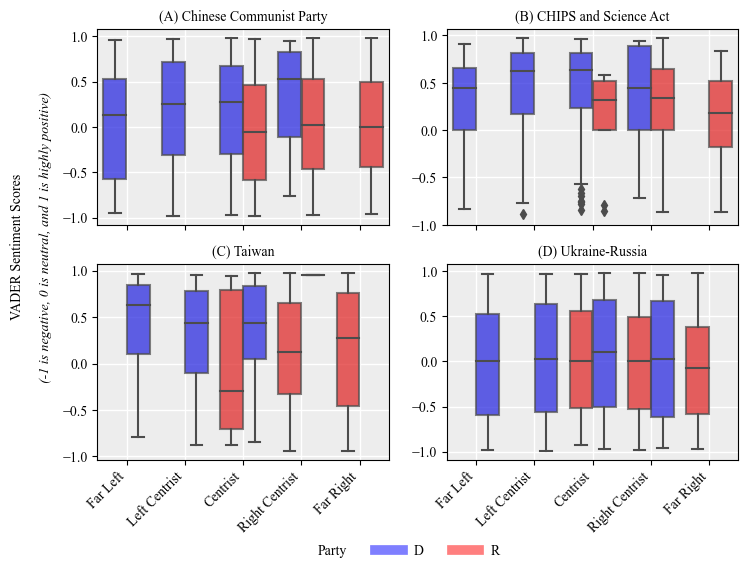

In [24]:
# geopolitical policies

geo_political_policies = categories["Geo Political Policies"]
geo_political_policies = list(geo_political_policies.keys())
geo_political_policies.remove("All")

fig4 = plt.figure(1, figsize=(8.27, 11.69), dpi=100)
n = 0

for policy in sorted(geo_political_policies, key=lambda x: x.lower()):

    title = " ".join(
        [
            word.capitalize() if word not in articles else word
            for word in policy.split(" ")
        ]
    )
    # category df
    cat_df = df[df.policies.str.contains(r"%s" % policy, re.I, regex=True)]

    n += 1

    ax = fig4.add_subplot(4, 2, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    sns.boxplot(
        data=cat_df,
        x="govtrack_cluster",
        y="compound_sentiment",
        hue="party",
        dodge=True,
        palette={"D": "b", "R": "r"},
        boxprops=dict(alpha=0.7),
    )
    # plt.xticks(ticks=labels, rotation=45, labels=label_names, fontsize=8)
    ax.set_xticklabels([])
    if n > 2:
        ax.set_xticks(labels)
        ax.set_xticklabels(labels=label_names, fontsize=10, rotation=45, ha="right",**csfont)
    plt.ylabel("")
    plt.xlabel("")
    plt.title("{}".format(f"({str_list[n-1]}) {title}"), fontsize=10,**csfont)
    ax.get_legend().remove()
    ax.set_facecolor("#D3D3D3")
    ax.patch.set_alpha(0.4)

    # grid lines based on major tick (x)
    ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="x")

    ax.xaxis.grid(True)  # Show the vertical gridlines

    # y axis grid
    ax.set_yticks(np.arange(-1, 1.5, 0.5), major=True)

    # grid lines based on minor tick (y)
    ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="y")

    # Remove minor ticks
    ax.tick_params(which="minor", bottom=False, left=False)

    # set axis below
    ax.set_axisbelow(True)

# custom legend
custom_legend(ax, bbox=(0.2, -0.4))

ax.text(-8, 0.5, "VADER Sentiment Scores", rotation=90, fontsize=10, **csfont)  # y labels
ax.text(-7.5, -0.2, "(-1 is negative, 0 is neutral, and 1 is highly positive)", fontsize=10, style='italic', **csfont, rotation=90)  # y labels
# plt.text(
#     -6,
#     4.2,
#     "Sentiment Scores (y) of the US. Legislators from Left to the Right per Geo-Political Policy",
#     fontsize=10,
# )
plt.show()
fig4.savefig(
    assets_dir+"\\geo_policies_cluster.png",
    dpi=100,
    bbox_inches="tight",
)

### Descriptive Statistics

In [25]:
from scipy import stats

In [26]:
# democrats stats

(df.query("party == 'D'")[["score", "username"]].drop_duplicates()).describe()

,score
count,192.000000
mean,0.275729
std,0.105307
min,0.000000
25%,0.210000
50%,0.280000
75%,0.340000
max,0.640000


In [30]:
#  republicans stats

(df.query("party == 'R'")[["score", "username"]].drop_duplicates()).describe()

,score
count,153.000000
mean,0.710000
std,0.098609
min,0.440000
25%,0.660000
50%,0.700000
75%,0.760000
max,1.000000


In [31]:
# mode R

stats.mode(df.query("party == 'R'")[["score", "username"]].drop_duplicates()["score"])

ModeResult(mode=array([0.7]), count=array([12]))

In [32]:
# mode R

stats.mode(df.query("party == 'D'")[["score", "username"]].drop_duplicates()["score"])

ModeResult(mode=array([0.3]), count=array([15]))

### Compute IQR